# Correlation Testing

In [11]:
# Matrix plotting from Nilearn: nilearn.plotting.plot_matrix
import numpy as np
import matplotlib.pylab as plt
import glob
import numpy
import pandas as pd
import nilearn
from nilearn.connectome import ConnectivityMeasure

def plot_matrices(matrices, matrix_kind):
    n_matrices = len(matrices)
    fig = plt.figure(figsize=(n_matrices * 4, 4))
    for n_subject, matrix in enumerate(matrices):
        plt.subplot(1, n_matrices, n_subject + 1)
        matrix = matrix.copy()  # avoid side effects
        # Set diagonal to zero, for better visualization
        np.fill_diagonal(matrix, 0)
        vmax = np.max(np.abs(matrix))
        title = '{0}, subject {1}'.format(matrix_kind, n_subject)
        plotting.plot_matrix(matrix, vmin=-vmax, vmax=vmax, cmap='RdBu_r',
                             title=title, figure=fig, colorbar=False)
        
    #fig.savefig("test_1.png")

# Read In Files

In [19]:
files=glob.glob('/Users/jennygilbert/Documents/betaseries_bevel/4_combine_timeseries/all/sub-*')
#files=glob.glob('/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/output/timeseries/rl/subs/sub-*')
reward_subjects = []
punish_subjects = []
choice_subjects=[]
pooled_subjects = []

for f in sorted(files):
    #print(f)
    array=numpy.loadtxt(f)
    #print(array)
    pooled_subjects.append(array)
    if "punish" in f.split("/")[-1]:
        punish_subjects.append(array)
    elif "choice" in f.split("/")[-1]:
        choice_subjects.append(array)
    else:
        reward_subjects.append(array)
#print("Reward: {} \nPunish: {} \nPooled: {} \n".format(reward_subjects, punish_subjects, pooled_subjects))

In [20]:
reward_subjects

[array([[ 247.4489288 , -256.4480286 , -144.8630219 , ...,  -80.48468018,
          -19.11026382,  -57.93573761],
        [ 130.9344482 ,  -39.92355347,  -19.90592003, ...,  -43.80885696,
           28.46882248,   21.05718994],
        [ -23.67282104,   41.38366318,   -8.87947655, ...,  -68.72846222,
          -85.28258514,  -41.74490356],
        ...,
        [  25.55000305,   -9.09135532,  -38.14513016, ...,  -39.7802124 ,
          -34.79125977,  -10.31419468],
        [  75.22717285, -115.6416473 ,   -6.07463407, ...,    2.78367424,
          108.6086349 ,  -33.79459763],
        [ -72.20731354, -149.2714996 ,  -38.52429199, ...,   29.85404015,
           11.53559875,   13.70609856]]),
 array([[-193.3236542 , -115.1269989 , -331.9634094 , ...,  -46.64183044,
         -382.7515564 , -374.9285889 ],
        [-147.4740906 , -141.5119019 ,  -41.71212769, ...,   62.57473755,
           62.2836647 ,  100.8060684 ],
        [ -99.92333221, -156.8079224 , -103.2353516 , ...,    9.7115593 ,

In [45]:
roi_datafile = "/Users/jennygilbert/Documents/betaseries_bevel/3_pull_timeseries/betaseries_rois_ga.txt"
#roi_datafile = "/projects/niblab/bids_projects/Experiments/Bevel/derivatives/betaseries/betaseries_rois.txt"
roi_df = pd.read_csv(roi_datafile, sep="\t")
#print(roi_df.head())
roi_df.set_index("Region", inplace=True)
roi_coords = [tuple(x) for x in roi_df.to_records(index=False)]

# Reward Image

In [22]:
rwd_correlation_measure = ConnectivityMeasure(kind='correlation')

rwd_correlation_matrices = rwd_correlation_measure.fit_transform(reward_subjects)
# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(rwd_correlation_matrices.shape))
rwd_mean_correlation_matrix = rwd_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(rwd_mean_correlation_matrix.shape))


from nilearn import plotting
#plt.matshow(rwd_mean_correlation_matrix,cmap='hot')

import numpy as np
import seaborn as sns


#plt.figure(figsize=(40,25))
#ax = sns.heatmap(rwd_mean_correlation_matrix, linewidth=0.5, cmap='coolwarm')

#Save the figure
#ax.figure.savefig("/Users/jennygilbert/Documents/betaseries_bevel/reward_coor_mat.png")

#plot_matrices(rwd_correlation_matrices[:5], 'reward')
#plot_matrices(rwd_mean_correlation_matrix, 'reward')



#plt.show()
#numpy.savetxt('/Users/jennygilbert/Documents/betaseries_bevel/reward_coor_mat.csv', rwd_mean_correlation_matrix, delimiter=',')


Correlations of subjects are stacked in an array of shape (85, 28, 28)
Mean correlation has shape (28, 28).


In [46]:
reward_col = ['mediumvioletred',
              'mediumvioletred',
              'orangered',
              'orangered',
              'orange',
              'khaki',
              'mediumvioletred',
              'mediumvioletred',
              'yellowgreen',
              'yellowgreen',
              'khaki',
              'khaki',
              'khaki',
              'khaki',
              'orange',
              'orange',
              'orangered',
              'orangered',
              'teal',
              'teal',
              'darkslateblue',
              'darkslateblue',
              'thistle',
              'thistle',
              'yellowgreen',
              'yellowgreen',
              'teal',
              'teal']

rewcollist=reward_col

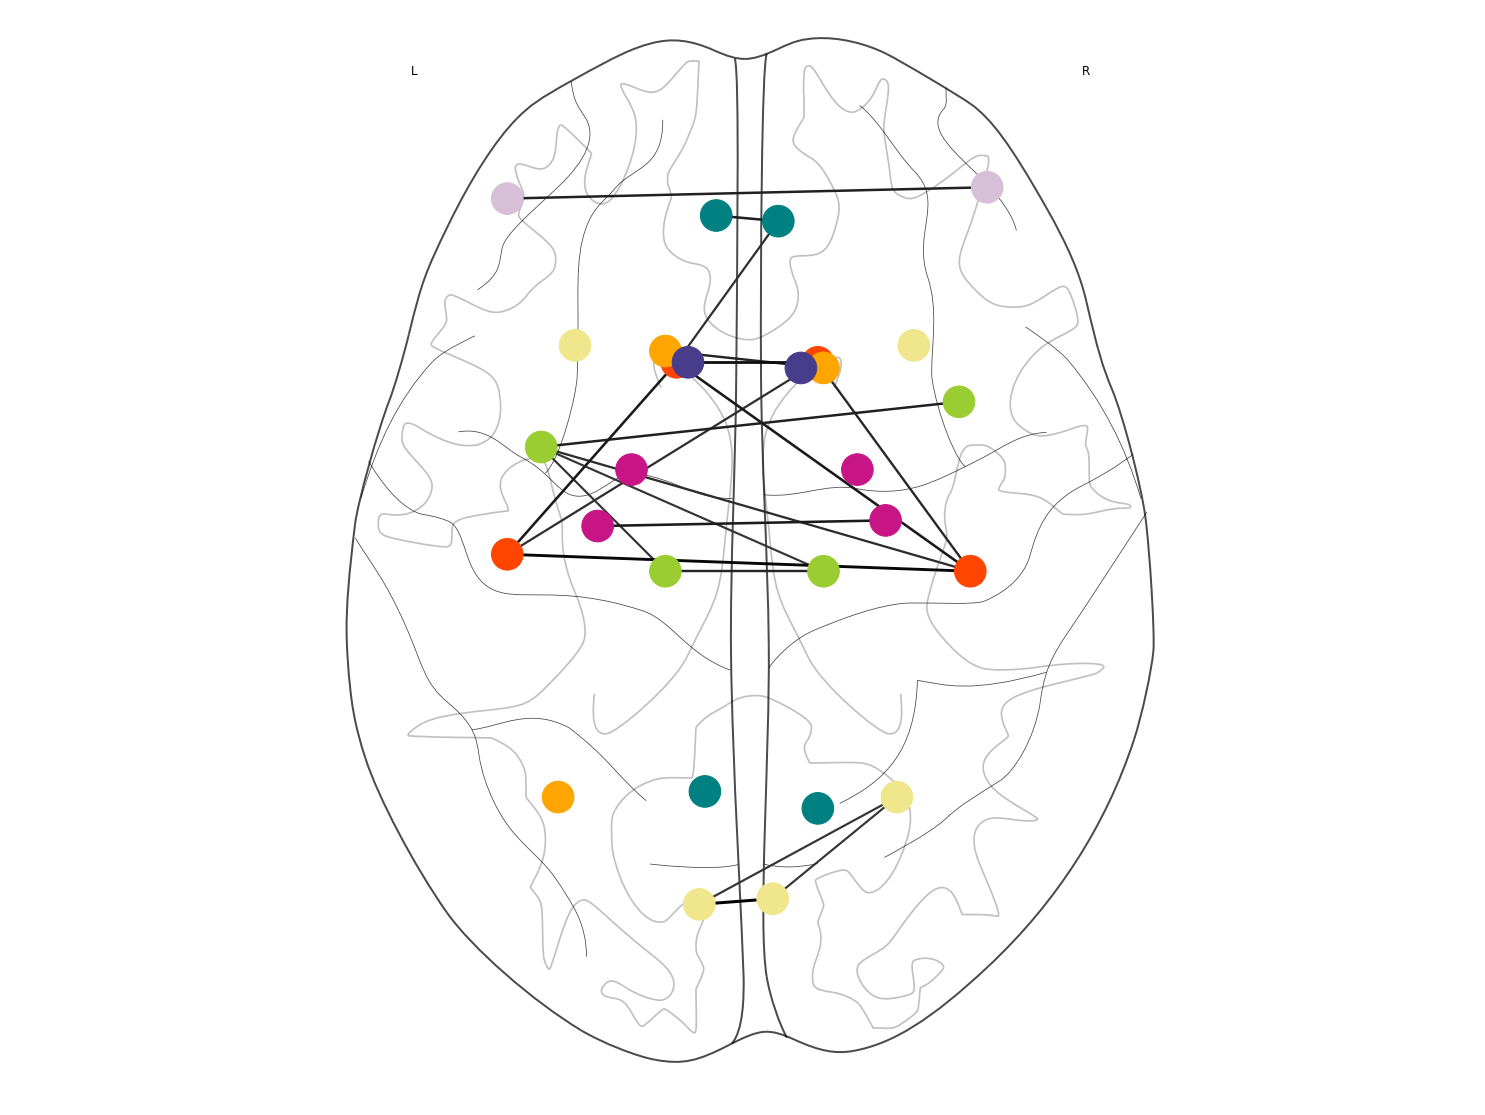

In [47]:
#For the graphical abstract

fig=plt.figure(figsize=(20,15))

display = plotting.plot_connectome(rwd_mean_correlation_matrix, roi_coords, node_size = 1000, node_color = rewcollist,  
                         display_mode = 'z', edge_threshold="95%", edge_cmap = "binary",figure=fig)


display.savefig('/Users/jennygilbert/Desktop/reward_ga_brain.png')     
# Don't forget to close the display
plt.show()
#display.close()

# Punishment Image

In [37]:
ph_correlation_measure = ConnectivityMeasure(kind='correlation')

ph_correlation_matrices = ph_correlation_measure.fit_transform(punish_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(ph_correlation_matrices.shape))
ph_mean_correlation_matrix = ph_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(ph_mean_correlation_matrix.shape))

#plt.figure(figsize=(40,25))
#ax = sns.heatmap(ph_mean_correlation_matrix, linewidth=0.5, cmap='coolwarm')

#Save the figure
#ax.figure.savefig("/Users/jennygilbert/Documents/betaseries_bevel/punish_coor_mat.png")

#plt.show()
#plot_matrices(ph_correlation_matrices[:5], 'punish')

#numpy.savetxt('/Users/jennygilbert/Documents/betaseries_bevel/punish_coor_mat.csv', ph_mean_correlation_matrix, delimiter=',')

Correlations of subjects are stacked in an array of shape (85, 28, 28)
Mean correlation has shape (28, 28).


In [40]:
punsih_col = ['mediumvioletred',
              'mediumvioletred',
              'orangered',
              'orangered',
              'orange',
              'khaki',
              'mediumvioletred',
              'mediumvioletred',
              'yellowgreen',
              'yellowgreen',
              'khaki',
              'khaki',
              'khaki',
              'khaki',
              'orange',
              'orange',
              'orangered',
              'orangered',
              'teal',
              'teal',
              'darkslateblue',
              'darkslateblue',
              'orangered',
              'orangered',
              'yellowgreen',
              'yellowgreen',
              'orangered',
              'orangered']

pcollist=punsih_col

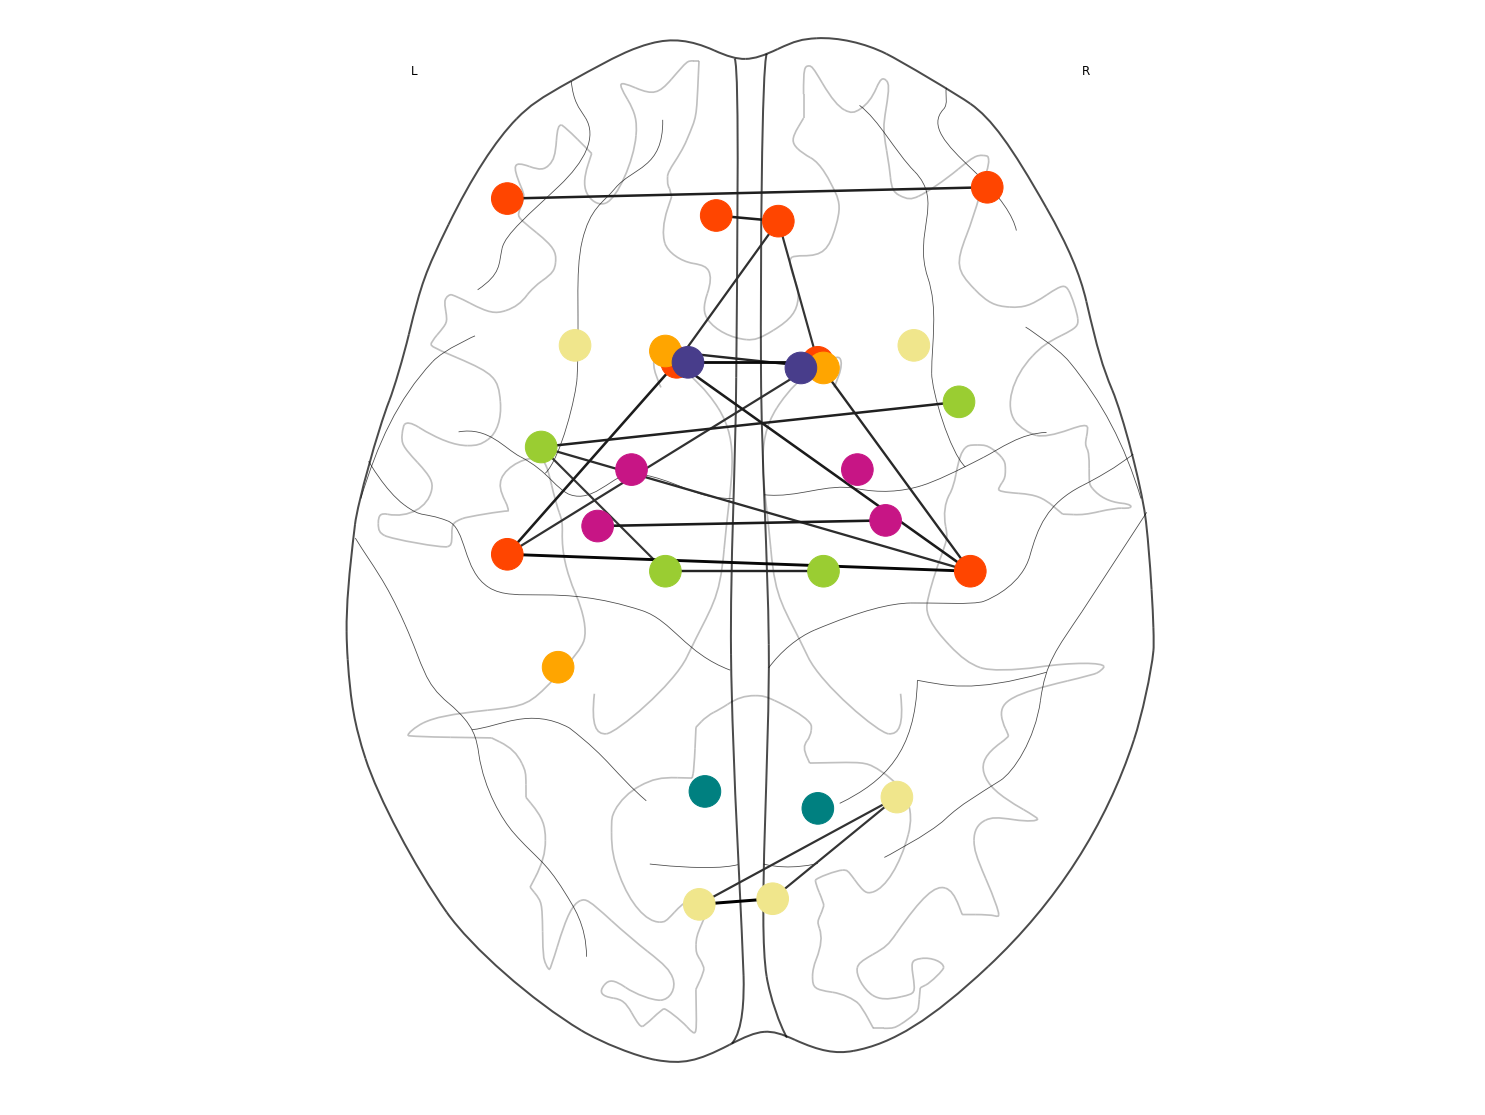

In [41]:
fig=plt.figure(figsize=(20,15))

display = plotting.plot_connectome(ph_mean_correlation_matrix, roi_coords, node_size = 1000, node_color = pcollist,  
                         display_mode = 'z', edge_threshold="95%", edge_cmap = "binary",figure=fig)


display.savefig('/Users/jennygilbert/Desktop/punish_ga_brain.png')   
# Don't forget to close the display
plt.show()
#display.close()

# Choice Image

In [42]:
c_correlation_measure = ConnectivityMeasure(kind='correlation')

c_correlation_matrices = c_correlation_measure.fit_transform(choice_subjects)

# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of subjects are stacked in an array of shape {0}'
      .format(c_correlation_matrices.shape))
c_mean_correlation_matrix = c_correlation_measure.mean_
print('Mean correlation has shape {0}.'.format(c_mean_correlation_matrix.shape))

Correlations of subjects are stacked in an array of shape (85, 28, 28)
Mean correlation has shape (28, 28).


In [43]:
choice_col = ['mediumvioletred',
              'mediumvioletred',
              'orangered',
              'orangered',
              'mediumvioletred',
              'orange',
              'mediumvioletred',
              'mediumvioletred',
              'yellowgreen',
              'yellowgreen',
              'orange',
              'orange',
              'khaki',
              'khaki',
              'orange',
              'orange',
              'orangered',
              'orangered',
              'teal',
              'teal',
              'darkslateblue',
              'darkslateblue',
              'orangered',
              'orangered',
              'yellowgreen',
              'yellowgreen',
              'orangered',
              'orangered']

ccollist=choice_col

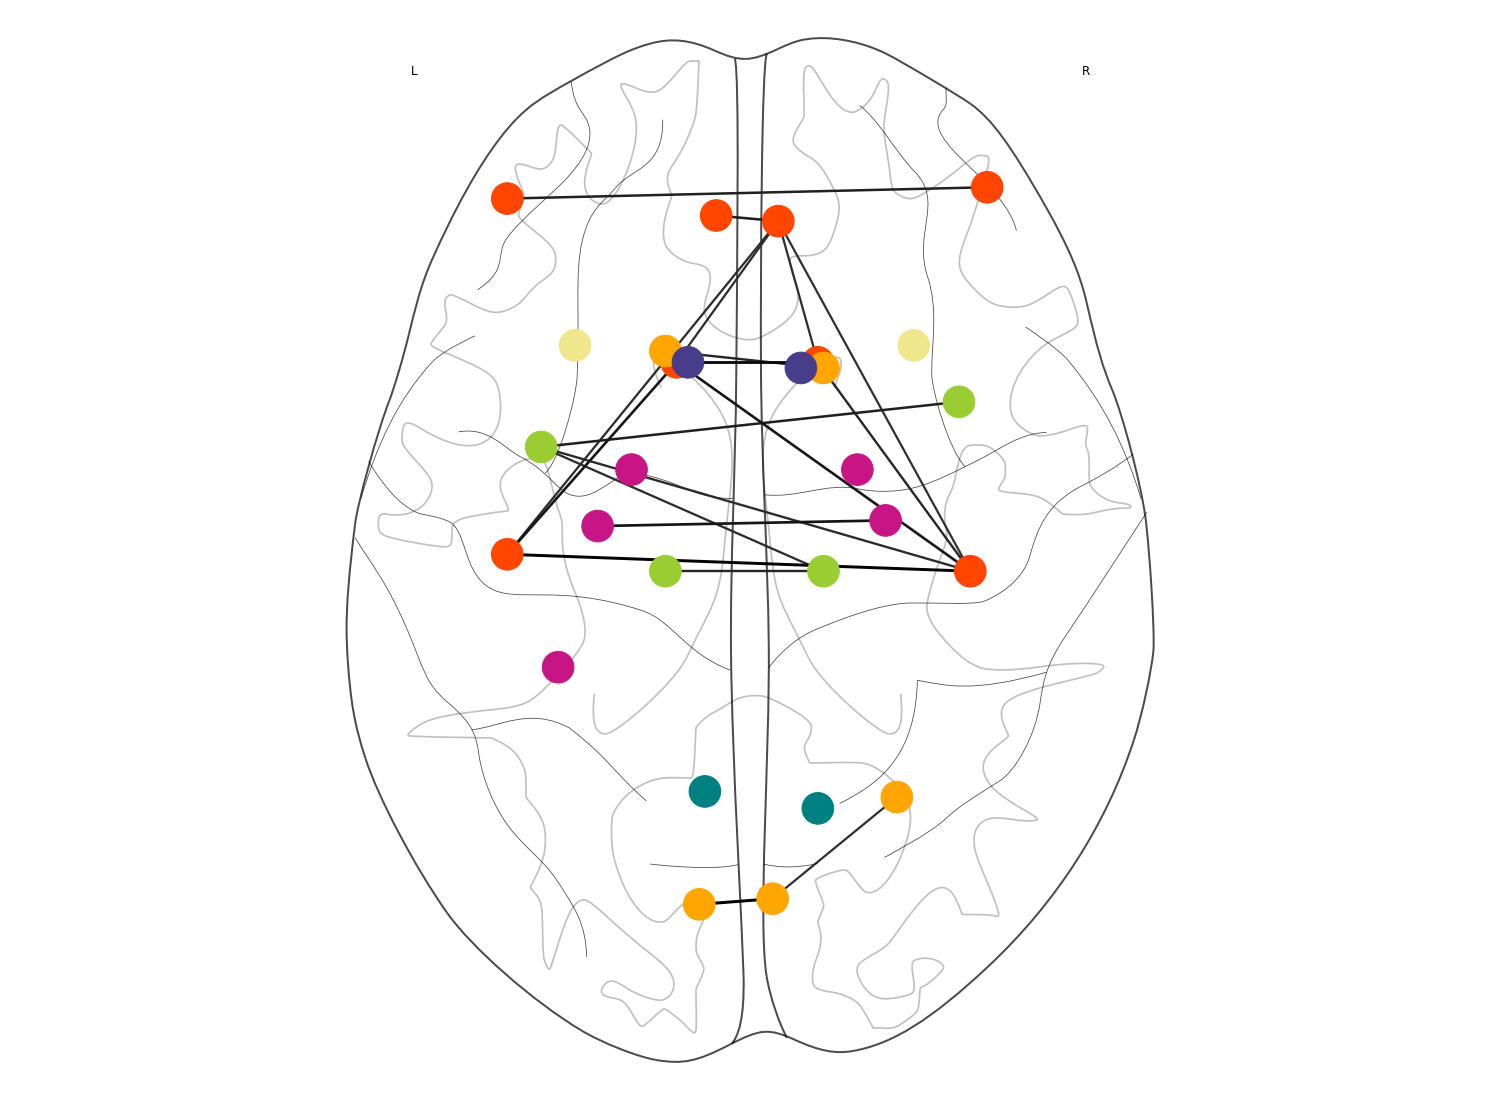

In [44]:
fig=plt.figure(figsize=(20,15))

display = plotting.plot_connectome(c_mean_correlation_matrix, roi_coords, node_size = 1000, node_color = ccollist,  
                         display_mode = 'z', edge_threshold="95%", edge_cmap = "binary",figure=fig)


display.savefig('/Users/jennygilbert/Desktop/choice_ga_brain.png')   
# Don't forget to close the display
plt.show()
#display.close()